In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b1_lin = np.linspace(-1, 1, 1000)
b2_lin = np.linspace(-1, 1, 1000)
b1, b2 = np.meshgrid(b1_lin, b2_lin)
b_12 = np.concatenate((b1.ravel().reshape(-1, 1), b2.ravel().reshape(-1, 1)), axis=1)

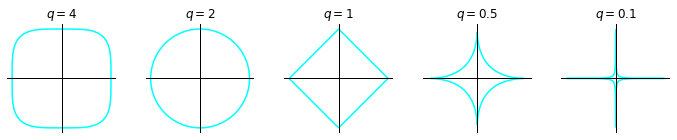

In [3]:
q = [0.1, 0.5, 1, 2, 4][::-1]
plt.figure(figsize=(12, 2))
for i, q_ in enumerate(q):
    c = np.zeros(len(b_12))
    for j, b12 in enumerate(b_12):
        c[j] = np.abs(b12[0]) ** q_ + np.abs(b12[1]) ** q_
    
    plt.subplot(1, 5, i+1, aspect='equal')
    plt.title("$q = $" + str(q_))
    plt.contour(b1, b2, c.reshape(b1.shape), levels=1, colors='cyan')
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    plt.axis('off')
plt.show()

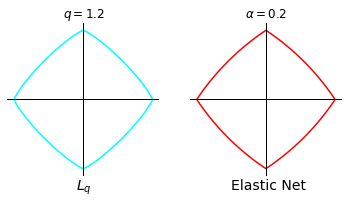

In [4]:
plt.figure(figsize=(6, 4))
c = np.zeros(len(b_12))
alpha = 0.2
q = 1.2

for j, b12 in enumerate(b_12):
    c[j] = np.abs(b12[0]) ** q + np.abs(b12[1]) ** q

plt.subplot(1, 2, 1, aspect='equal')
plt.title("$q = $" + str(q))
plt.contour(b1, b2, c.reshape(b1.shape), levels=1, colors='cyan')
plt.annotate("$L_q$", xy=(-0.1, -1.3), annotation_clip=False, fontsize=14)
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.axis('off')

c = np.zeros(len(b_12))
for j, b12 in enumerate(b_12):
    c[j] = alpha * b12[0] ** 2 + (1 - alpha) * np.abs(b12[0]) + alpha * b12[1] ** 2 + (1 - alpha) * np.abs(b12[1])

plt.subplot(1, 2, 2, aspect='equal')
plt.title(r"$\alpha = $" + str(alpha))
plt.contour(b1, b2, c.reshape(b1.shape), levels=1, colors='red')
plt.annotate("Elastic Net", xy=(-0.6, -1.3), annotation_clip=False, fontsize=14)
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.axis('off')
plt.show()